# Descriptive Statistics Problems

## Exercise 1 – How long are movie titles?

In this exercise, you will apply descriptive statistics techniques to a real dataset: a database of 1000 popular movies from the IMDb website.

From the title of each movie, you will:
- Calculate the title length (in characters).
- Obtain key statistical metrics: mean, median, mode, range, variance, standard deviation, skewness, and kurtosis.
- Identify the longest and shortest titles.
- Visualize the distribution of these lengths with a histogram and a density curve.


In [28]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, mode

# Load IMDb dataset
url = "../assets/imdb_1000.csv"
df = pd.read_csv(url)
df

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."


In [29]:
# Create a new column called 'title_length' with the length (number of characters) of each title

def show_data(descrip_dict, padding = 10):
    for name, description in descrip_dict.items():
        print(f'{name:10}: {description}')

df['title_length'] = df.title.str.len()
title_len = df.title_length

In [30]:
# Calculate mean, median, and mode of the 'title_length' column
data_to_print = {
    'mean' : title_len.mean(),
    'median':title_len.median(),
    'mode(s)':list(title_len.mode())
}

show_data(data_to_print)

mean      : 15.481103166496425
median    : 14.0
mode(s)   : [12]


In [31]:
# Calculate the range, variance, and standard deviation of 'title_length'
data_to_print = {
    'range' : list((int(title_len.min()), int(title_len.max()))),
    'variance':title_len.var(),
    'standard deviation':title_len.std()
}

show_data(data_to_print)

range     : [1, 68]
variance  : 72.1067488840288
standard deviation: 8.491569282766807


In [32]:
# Calculate skewness and kurtosis of the 'title_length' column

data_to_print = {
    'asymetry measure':title_len.skew(),
    'kurtosis measure': title_len.kurtosis()
}

show_data(data_to_print)

asymetry measure: 1.5252523464631278
kurtosis measure: 3.8122887061291544


In [33]:
# Print the shortest and longest title based on their length

data_to_print = {
    'longest title':df.loc[title_len.idxmax()].title,
    'shortest title': df.loc[title_len.idxmin()].title
}

show_data(data_to_print)

longest title: Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb
shortest title: M


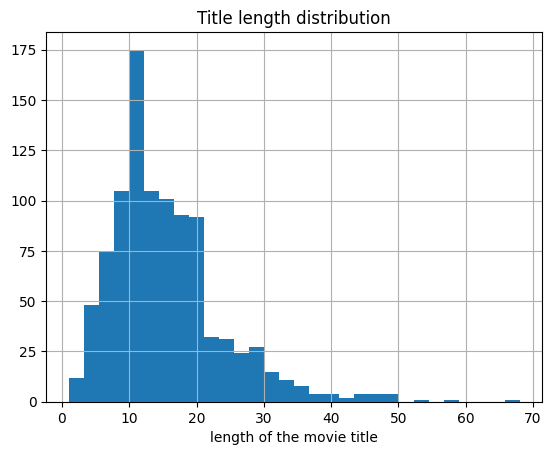

In [34]:
# plot your results

plt.title('Title length distribution')
plt.hist(title_len, bins = 30)
plt.xlabel('length of the movie title')
plt.grid()
plt.show()


---

## Exercise 2 – Manual Calculation of Standard Deviation

In this exercise, you will manually calculate the standard deviation by selecting five actual titles from the movie dataset you loaded earlier.


In [35]:
# Create a list with 5 actual values from df['title_length'], for example: [10, 13, 14, 18, 22]

my_list_indexes = np.random.choice(df.index, 5, False)
my_list = df.loc[my_list_indexes].title_length

df.loc[my_list_indexes,['title', 'title_length']]

,title,title_length
50,Cinema Paradiso,15
202,La leggenda del pianista sull'oceano,36
88,The Kid,7
402,Once,4
869,A Nightmare on Elm Street,25


In [36]:
# Calculate the mean of the 5 values
mean = my_list.sum()/len(my_list)

print(f'mean: {mean}')


mean: 17.4


In [37]:
# Calculate the squared differences with respect to the mean

differences = (my_list - mean)**2
print(f'differences: \n{differences}')

differences: 
50       5.76
202    345.96
88     108.16
402    179.56
869     57.76
Name: title_length, dtype: float64


In [38]:
# Calculate the variance (average of
#  the squared differences) and its square root to obtain the standard deviation

var = differences.sum()/len(differences)
print(f'variance: {var}')
print(f'standard deviation: {var**(1/2)}')

variance: 139.44
standard deviation: 11.80847153530041
